Laura Esperanza Vargas Patarroyo CC 1193117801

In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal.windows

Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10 segundos de la señal usando Colab

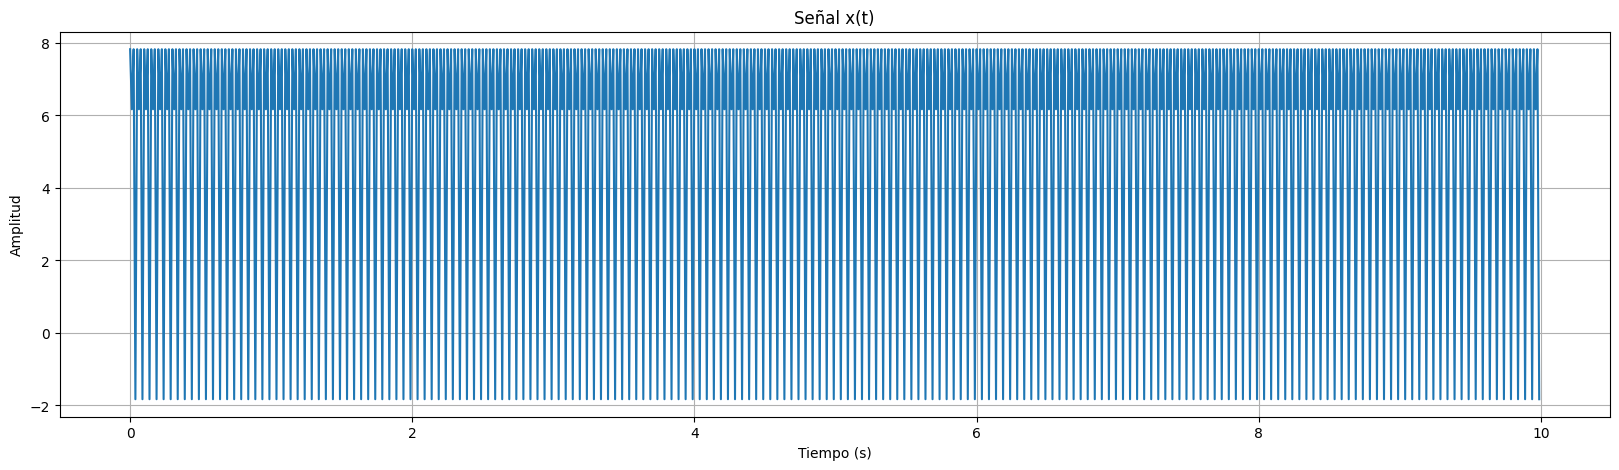

In [14]:
#senal
#definiendo la frecuencia de muestreo
fs=80 #80 pi=fmax*2 pi --> fmax= 40 fs=40*2 (Nyquist)
t = np.arange(0, 10, 1/fs)  # tiempo de 0 a 10 segundos, con un paso de 1/fs
x = 4*np.cos(80*np.pi*t+(np.pi/4))+4*np.sin(40*np.pi*t)+5

plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.title('Señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


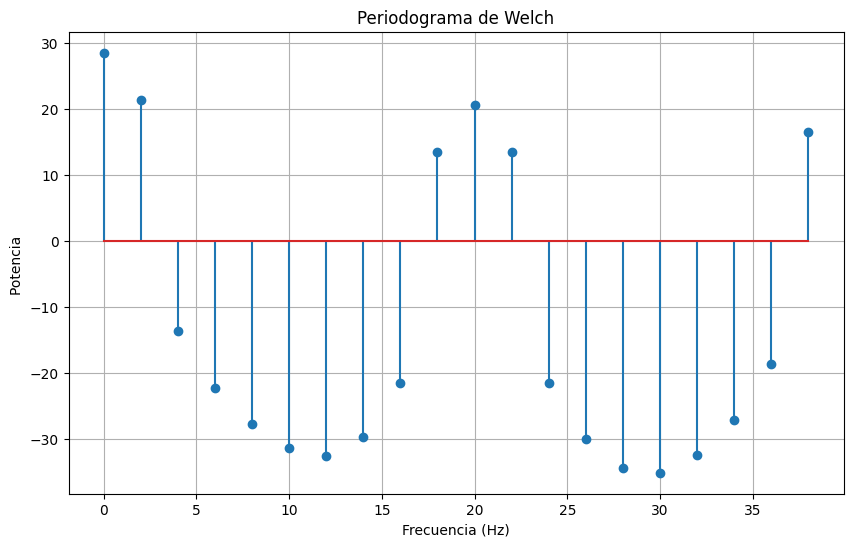

In [27]:
def periodograma_welch(x, M, S, fs, ventana):
    N = len(x)
    num_segments = int(np.floor((N - M) / (M - S)) + 1)
    pot = np.zeros(M)

    if ventana == 'rect':
        ventana = np.ones(M)
    elif ventana == 'hamming':
        ventana = window = scipy.signal.windows.hamming(M)
    elif ventana == 'blackman':
        ventana = np.blackman(M)

    for i in range(num_segments):
        inicio = i * (M - S)
        fin = inicio + M

        segment = x[inicio:fin]
        enventanar= segment * ventana

        # FFT - Transformada discreta ded fourier
        x_k = np.fft.fft(enventanar)

        # Potencia
        pot_segment = (np.abs(x_k)**2)
        energia = np.sum(ventana**2)
        pot_segment /= energia
        pot += pot_segment

    # Promediar los periodogramas modificados
    pot /= num_segments
    freqs = np.fft.fftfreq(M, d=1/fs)

    # La mitad positiva del espectro (simetría de la FFT)
    mitad = M // 2
    pot = pot[:mitad]
    freqs = freqs[:mitad]

    return freqs, pot

# Parámetros
M = 40
S = 30
freqs, pot = periodograma_welch(x, M, S, fs, 'hamming')

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.stem(freqs, 10 * np.log10(pot))  # Convertir a escala logarítmica
plt.title("Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia ")
plt.grid(True)
plt.show()


Una señal fisiológica definida en el rango entre a Hz y b Hz se toma con frecuencia de muestreo
de 100 Hz. Para esta señal:

In [ ]:
#Filtro
Fs=100
